In [2]:
import sys
sys.path.append('/Users/richardtran/repos/Shell_repo/')
from analysis.surface_energy import *

sys.path.append('/Users/richardtran/repos/ocp')
from ocpmodels.datasets import LmdbDataset


# Get all the entry_ids so we can make sure we are making one plot for one material at a time

In [3]:
slab_data_objs = LmdbDataset({"src": "datasetss/slabs5.lmdb"})
entry_ids = []
for dat in slab_data_objs:
    if dat.entry_id not in entry_ids:
        entry_ids.append(dat.entry_id)
        
entry_id = 'mp-754455'

Chemical potential ($\Delta\mu$) can be written as a function of temperature (T) and pressure (P) as such:
$\Delta\mu(T, P) = g(T, H, S) + k_BTln(\frac{P}{P_0})$
where H and S are determined experimentally from the JANAF thermodynmaics tables, $k_B$ is Boltzmann constant, and $P_0=0.1 MPa$ is the standard pressure of oxygen. 

# Get plots of surface energy vs Miller indices w/ $\Delta\mu_{O}$ = $\Delta\mu_{O}(STP)$

-0.2515781507521796


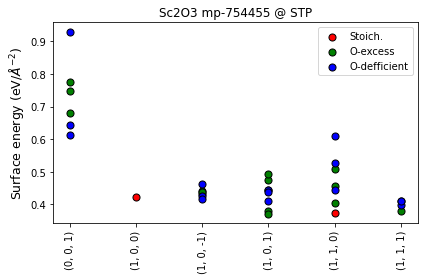

In [4]:
dmu_STP = get_dmu(273.15, 0.1)
print(dmu_STP) # chemical potential of O at STP
dat_list = [dat for dat in slab_data_objs if dat.entry_id == entry_id]
plt = plot_surface_energies(dat_list, dmu=dmu_STP)
name = '%s %s @ STP' %(Composition(dat_list[0].bulk_formula).reduced_formula, dat_list[0].entry_id)
plt.title(name)
plt.tight_layout()
plt.savefig('plots/se_vs_hkl/%s.pdf' %(name))
plt.show()
plt.close()

# Get surface energy vs $\Delta\mu_{O}$

/Users/richardtran/repos/pymatgen/pymatgen/analysis/surface_analysis.py:709: UserWarning: No solution
  warnings.warn("No solution")


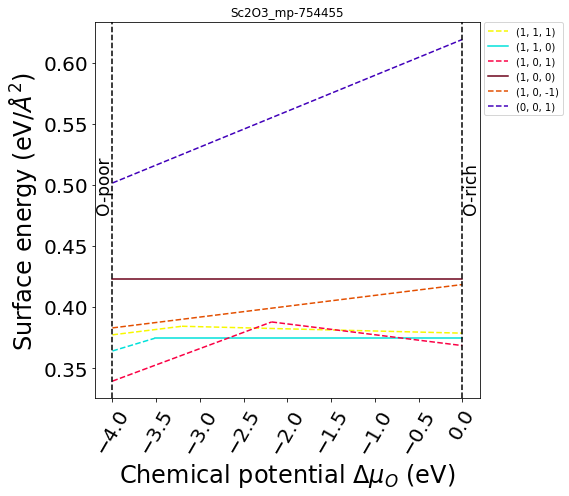

In [5]:
dat_list = [dat for dat in slab_data_objs if dat.entry_id == entry_id]
plt = plot_chempot_vs_surface_energy(dat_list, chempot_range=[-4,0])
name = '%s_%s' %(Composition(dat_list[0].bulk_formula).reduced_formula, dat_list[0].entry_id)
plt.title(name)
plt.tight_layout()
plt.savefig('plots/se_vs_mu/%s.pdf' %(name))
plt.show()
plt.close()

# Get surface energy as a function of $\Delta \mu_O$(T, P)

(1, 1, 1)


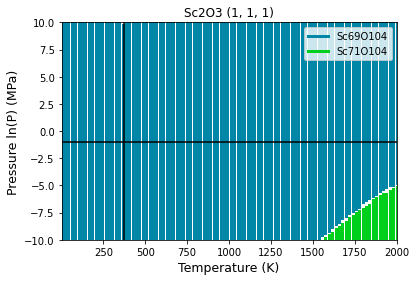

(1, 1, 0)


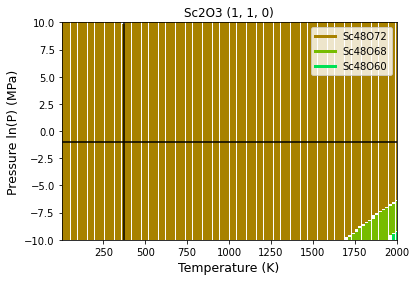

(1, 0, 1)


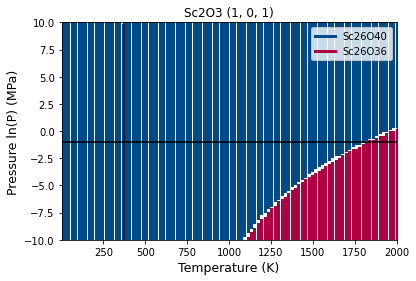

(1, 0, 0)


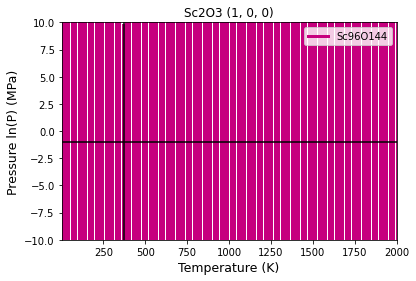

(1, 0, -1)


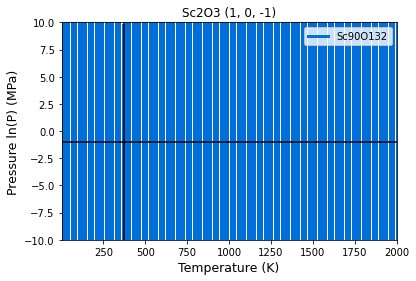

(0, 0, 1)


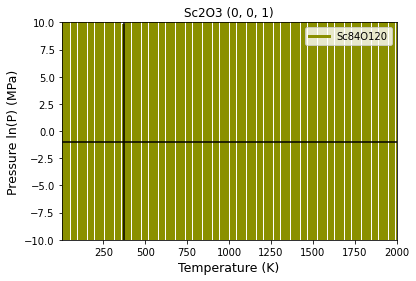

In [9]:
dat_list = [dat for dat in slab_data_objs if dat.entry_id == entry_id]
dat_dict = {}
for dat in dat_list:
    if dat.miller not in dat_dict.keys():
        dat_dict[dat.miller] = []
    dat_dict[dat.miller].append(dat)
    
for hkl in dat_dict.keys():
    print(hkl)
    plt = plot_P_vs_T(dat_dict[hkl], [1,2000], [-10,10], 100)
    name = '%s %s' %(Composition(dat_dict[hkl][0].bulk_formula).reduced_formula, hkl)
    plt.title(name)
    plt.savefig('plots/T_vs_P/%s.pdf' %(name))
    plt.show()
    plt.close()

# Wulff shape as a function of T and P

Plotting all facets on a T vs P map is going to be a mess. A more useful plot would be the Wulff shape. This is a convex hull formed from plotting the vectors of all hkl from an origin with a magnitude proportional to that of the corresponding surface energy. Planes perpendicular to the corresponding hkl vectors are then plotted to form convex hulls. The smallest enclosed convex hull is the Wulff shape or equilibrium crystal shape. This is useful because it is an indicator of which facet is going to be most stable on a crystal.

In [15]:
from pymatgen.ext.matproj import MPRester
mprester = MPRester('mlcC4gtXFVqN9WLv')
bulk = mprester.get_entry_by_material_id(entry_id, inc_structure=True, conventional_unit_cell=True).structure
dat_list = [dat for dat in slab_data_objs if dat.entry_id == entry_id]
surfplt = make_surface_energy_plotter(dat_list, bulk_structure=bulk)

for T in np.linspace(1, 2000, 5):
    for P in np.linspace(-10, 10, 5):
        dmu = get_dmu(T, 10**(P))
        wulff = surfplt.wulff_from_chempot({Symbol('delu_O'): dmu})


/Users/richardtran/repos/pymatgen/pymatgen/ext/matproj.py:181: UserWarning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.
  warnings.warn(
